---
# File I/O

### PHYS 240
### Dr. Wolf

# "File I/O" refers to reading (**I**nput) and writing (**O**utput) files
Examples:
- Keep grade data in a comma-separated-value (CSV) file, compute averages and plot histograms in a program that reads data in
- Perform orbital dynamics simulation and write positions and momenta of all particles to a file at each timestep for later analysis
- Gather data from an open-source provider, read it in, and search for patterns and trends

Files usually store many lines of **text**, so File I/O usually comes hand in hand with lists and string manipulation.

# Files are represented in python as their own objects that can be written to or read from
We create a file object (which represents a file on the computer) with the `open()` function, which is sort of like a constructor for the `file` datatype. The first argument is the name of the file, and the second is the "mode" we want the file to work in. There are several modes, but the most useful ones are summarized below

| Mode | Description                                  |
|:----:|:---------------------------------------------|
| `r`  | **Read** from a file **only**; no writing    |
| `w`  | **Write** to blank (or newly erased) file    |
| `a`  | **Append** (write, but don't erase) to the end of a file |
| `r+` | **Read** *or* **write** text from/to file    |

# First example: writing a simple file
We want to create a new file called `hello.txt` and open it for writing. Then we will write the string `"Hello, world!"` to it. Finally we will close the file (more on closing in a bit).

In [ ]:
f = open('hello.txt', 'w')
f.write('Hello, world!')
f.close()

After executing this code look in your files list, and you should find `hello.txt` waiting for you. Open it up and see what it contains.

# Second Example: overwriting a file
We've created `hello.txt`, but what happens if we open that file again and write a different string to it?

In [ ]:
f = open('hello.txt', 'w')
f.write('Goodbye, world!')
f.close()

Look again at the contents of `hello.txt`. What happend?

# Aside: Filenames
While we won't delve into the bowels of operating system, we should explain a bit about how files are named. File names have two parts separated by a period: the base name and the extension:
<div style="width: 50%; margin: auto;">
    <img src=filename.svg alt="Filename Anatomy">
</div>

## Base name
What you probably think of the file. Usually text, numbers, underscores. When possible, best to avoide spaces and other special characters (some operating systems get grumpy).

## Extension
Even if you don't see it in your OS, they're there. Indicates to OS or program how to interpret the data inside (e.g. plain text, comma-separated data, binary data, h.265-encoded video, etc.).

# `f.close()`: Why bother closing?
- Don't want to risk corrupting the file with accidental writes
- While a file is open, operating system won't let other resources open the file.
- Even if it's in read mode, what if a program gets stuck in an infinite loop while a file is open?

Best practice: open, do what you need to do, and close as fast as possible!


# File methods: writing
If a file has a write-compatible mode (`'w'`, `'a'`, or `'r+'`), the following methods can write (or append) to a file:
- `write()`: takes argument (a string) and writes to the file or appends to the end of it
- `writelines()`: takes a list of strings and writes each to file. Does **not** add new lines for you!

In [ ]:
f = open('several_lines.txt', 'w')
f.writelines(['is', 'each', 'word', 'a', 'line?'])
f.close()

We should change the above cell to this code to show how we could use `write` and the `join` method of strings to actually output multiple lines:
```python
f = open('several_lines.txt', 'w')
f.write('\n'.join(['is', 'each', 'word', 'a', 'line?']))
f.close()
```

If in append mode (`'a'`) instead of write mode, these methods add text to the very end of a file rather than overwriting the contentes of the files.

# Writing to files with print
If a file is opened in a mode that allows writing, we can also redirect the output of print to a file. This is nice since we know how to change some behavior of `print` already. To direct this output to a file, simply set the keyword argument `print` to the file object in question.

In [ ]:
f = open('from_print.txt', 'w')
print('this', 'came', 'from', 'calling', 'print', sep='\t', end='!!!', file=f)
f.close()

# File methods: reading
If a file has a read-compatible mode (`r`, `r+`), we can extract text from the file (though reading alone cannot change the file). We have three useful methods:

- `read()`: With no argument, reads entire contents of file into a single string
- `readline()`: Reads current (default: first) line, up to and including the newline character, into a string. A subsequent call to `readline()` will read in the *next* line.
- `readlines()`: Reads in all lines into a list of strings, each including the newline character

# Three ways to read!

In [ ]:
# read: all in one go
f = open('several_lines.txt', 'r')
read_contents = f.read()
f.close()
print(read_contents)

In [ ]:
# readline: just one line at a time
f = open('several_lines.txt', 'r')
first_line = f.readline()
second_line = f.readline()
f.close()
print('first line is "{}"'.format(first_line))
print('second line is "{}"'.format(second_line))

In [ ]:
# readlines: all lines as a list of strings
f = open('several_lines.txt', 'r')
readlines_contents = f.readlines()
f.close()
readlines_contents

# The Dr. Wolf Special
Often (**very often**), you want a **list** of strings representing each line, but _without_ the newline characters at the end. One could transform the result of calling the `readlines` method of a file, but I prever using `read` and `split` to accomplish the same task a bit more cleanly:

In [ ]:
f = open('several_lines.txt', 'r')
# read contents, remove any whitespace at the end, and then get
# a list of all lines
lines = f.read().rstrip().split('\n')
f.close()
print(f'Lines is a {type(lines)} with a value of {lines}')

# One more trick: text files are iterable
Their "elements" are lines. So looping over a file effectively pipes the return value of `readline` into the looping variable.

In [ ]:
f = open('several_lines.txt', 'r')
for line in f:
    print(line)
f.close()

Recall: each line has its own newline character, and each call to print also adds its own newline. We could get rid of the one from the lines by calling the `strip` method on strings, and we could also change the behavior of `print` by setting the `end` keyword argument to something more appropriate.

# File types: Comma-Separated Values (`.csv`)
```
val1a,val1b,val1c,val1d
val2a,val2b,val2d,val2d
```
- **Rows** are separated by newlines
- **Columns** are separated by commas

This is a **very** common (and useful) file format that can even be read in and saved from spreadsheet applications like Excel, Google Sheets, and Numbers. The only major downside is when you have to deal with values that themselves should have commas in them!

# Example: Airline Safety Data (Solution at End)
Along with this handout is a file called `airline_safety.csv` that contains data on avearge weekly kilometer-seats of various airlines (how many seats travel how many kilometers each week) and how many fatalaties occurred on flights from those airlines over various time frames. It is stored in a comma-separated-value (CSV) format.

Examine this data and then write a program to ingest this data into a list of lists. The main list should have one list for each column, each sub-list should be composed of strings or integers as is appropriate for the data.

In [11]:
# do this together in class
# Read data from file

# set up data structures (lists) for headers and data

# Process data into lists

# For fun: plot stuff!

# A Final Project Tease
`pandas` is an extremely powerful tool that makes ingesting and working with large datasets extremely easy. Compare the last example with the code below.

In [17]:
import pandas as pd
df = pd.read_csv('airline_safety.csv')
df

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


# Example: Airline Safety Data SOLUTION

Text(0, 0.5, 'Fatalaties Between 2000 and 2014')

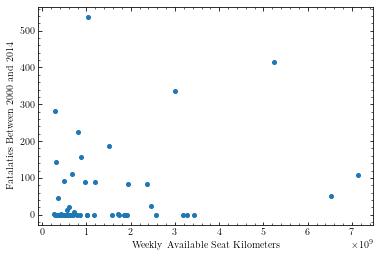

In [14]:
# open up file read data into a list of strings, and close the file
f = open('airline_safety.csv', 'r')
lines = f.read().rstrip().split('\n')
f.close()

# extract headers (first line of strings)
headers = lines[0].split(',')

# set up data structure, which will be a list of lists.
# Each sub-list will contain one column of data
data = []
for i in range(len(headers)):
    data.append([])
    
# Process the non-header data line by line
for line in lines[1:]:
    # break line up by element and plop each datum
    # into the right list of `data`
    for i, datum in enumerate(line.split(',')):
        if i == 0:
            # zeroth row is a string, so just append the
            # value with no processing
            data[i].append(datum)
        else:
            # all other rows are just integers, so convert
            # the to integers before appending
            data[i].append(int(datum))
            
# plot everything for funsies (we'll learn about this soon!)
xs = data[headers.index('avail_seat_km_per_week')]
ys = data[headers.index('fatalities_00_14')]
            
import matplotlib.pyplot as plt
plt.scatter(xs, ys)
plt.xlabel("Weekly Available Seat Kilometers")
plt.ylabel("Fatalaties Between 2000 and 2014")
